<a href="https://colab.research.google.com/github/MarcusDang/image-web-scrapping/blob/main/Testing_Web_Scrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wget
!pip install mechanicalsoup

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=48b08296e861791a853adfa92907a6456f46496bb4a9308154264b3282bb923f
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
import os
import io
import requests
from PIL import Image
import mechanicalsoup


def image_scrapping_function(input):
    """Scrape images from Google Images based on a search term and save them in a directory.

    Args:
        input (str): The search term to use for scraping images.

    Returns:
        None
    """
    # Input the Browser URL
    browser = mechanicalsoup.StatefulBrowser()
    url = "https://images.google.com/"
    browser.open(url)

    # Get HTML
    browser.get_current_page()

    # Target the search input
    browser.select_form()
    browser.get_current_form().print_summary()

    search_term = input
    # Search for a term
    browser["q"] = search_term

    # Submit "Click" search
    browser.launch_browser()
    response = browser.submit_selected()

    # Open new URL
    new_url = browser.get_url()
    browser.open(new_url)

    # Get HTML
    page = browser.get_current_page()
    all_images = page.find_all("img")

    # Target the source attribute
    image_source = []
    for image in all_images:
        image = image.get("src")
        image_source.append(image)

    image_source = [image for image in image_source if image.startswith("https")]

    # Create path to store downloaded image
    path = "/content/drive/MyDrive/[02] Data Analytics Tutor/Phase 1/Scrapping"
    path = os.path.join(path, search_term)
    # Create directory
    os.makedirs(path, exist_ok=True)

    # Download images
    for i, image in enumerate(image_source):
        save_as = os.path.join(path, f"{search_term}{i}.jpg")
        response = requests.get(image)
        with open(save_as, "wb") as f:
            img = Image.open(io.BytesIO(response.content))
            img.save(f, "JPEG", quality=10000)


In [8]:
allcountries = ["Canada", "Danang City"]

for country in allcountries:
  image_scrapping(country + "")


<input name="tbm" type="hidden" value="isch"/>
<input name="ie" type="hidden" value="ISO-8859-1"/>
<input name="hl" type="hidden" value="en"/>
<input name="source" type="hidden" value="hp"/>
<input name="biw" type="hidden"/>
<input name="bih" type="hidden"/>
<input autocomplete="off" class="lst" maxlength="2048" name="q" size="57" style="margin:0;padding:5px 8px 0 6px;vertical-align:top;color:#000" title="Search Images" value=""/>
<input class="lsb" name="btnG" type="submit" value="Search Images"/>
<input id="gbv" name="gbv" type="hidden" value="1"/>
<input name="tbm" type="hidden" value="isch"/>
<input name="ie" type="hidden" value="ISO-8859-1"/>
<input name="hl" type="hidden" value="en"/>
<input name="source" type="hidden" value="hp"/>
<input name="biw" type="hidden"/>
<input name="bih" type="hidden"/>
<input autocomplete="off" class="lst" maxlength="2048" name="q" size="57" style="margin:0;padding:5px 8px 0 6px;vertical-align:top;color:#000" title="Search Images" value=""/>
<input c

In [19]:
allcountries = ["The United State in 19th Century"]

for country in allcountries:
  image_scrapping_function(country + "")

<input name="tbm" type="hidden" value="isch"/>
<input name="ie" type="hidden" value="ISO-8859-1"/>
<input name="hl" type="hidden" value="en"/>
<input name="source" type="hidden" value="hp"/>
<input name="biw" type="hidden"/>
<input name="bih" type="hidden"/>
<input autocomplete="off" class="lst" maxlength="2048" name="q" size="57" style="margin:0;padding:5px 8px 0 6px;vertical-align:top;color:#000" title="Search Images" value=""/>
<input class="lsb" name="btnG" type="submit" value="Search Images"/>
<input id="gbv" name="gbv" type="hidden" value="1"/>


### **Source**: Web Scrapping with Mechanical Soup
https://youtu.be/drDdb1MBBfI

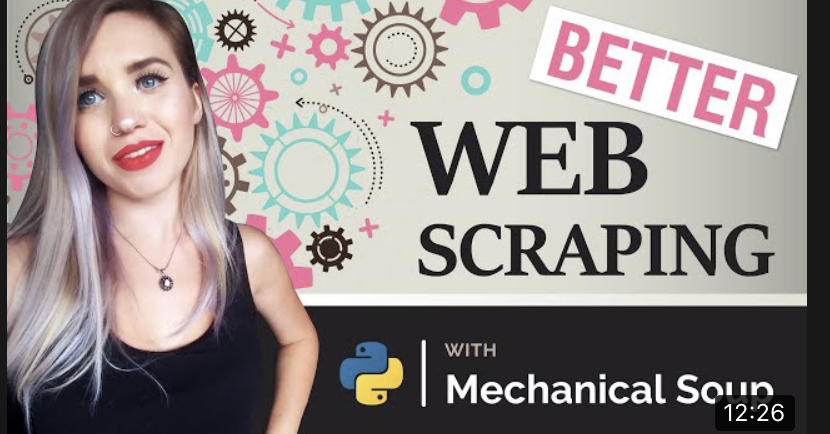